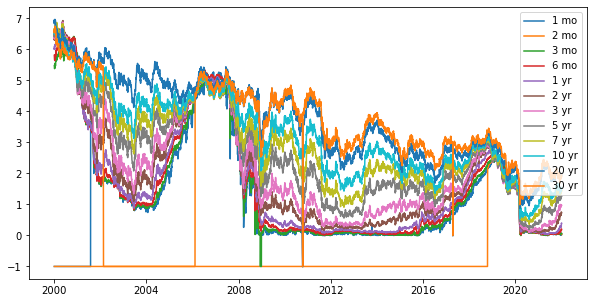

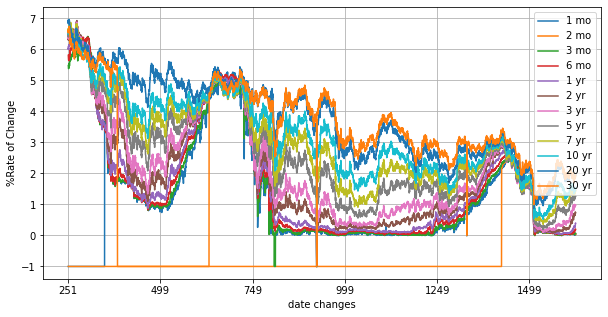

In [24]:
# grab data : https://stackoverflow.com/questions/10556048/how-to-extract-tables-from-websites-in-python
# pickle : https://stackoverflow.com/questions/11218477/how-can-i-use-pickle-to-save-a-dict

import requests
import pandas as pd
import pickle
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import numpy as np

def grab_year(year):
    # Saves financial tables from a government website
    # The result is returned
    url = 'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/TextView.aspx?data=yieldYear&year='
    url_year = url + str(year)
    raw_html = requests.get(url_year).content
    df = pd.read_html(raw_html)[1]
    # df.to_csv('data_'+str(year)+'.csv') #another saving option
    return df

def scrape():
    # Collects the tables for a range of years
    # Saves the result as a pickle
    # Minimize the impact on the website by accessing the data only once
    # and saving it in a pickle file.
    data = [ grab_year(i) for i in range(2000,2022) ]
    with open('data.p', 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_data(fn):
    # Load the pickle file from a filename
    # Return that
    scrape()
    df_list = pd.read_pickle(fn)
    return df_list

def get_date_changes(dates):
    # Returns a list of tuples from the dataframe dates column
    # The tuple will be [index of change, last two digits of year]
    #   The type will be a List[int, string]
    # Remember to include the start and end years
    
    df1 = pd.DataFrame([],columns=['indx','Year','Year_int'])
    d = [i.split('/')[2] for i in dates]
    for id,val in enumerate(d):
        df1.loc[len(df1)] = [id,val,int(val)]

    df2 = df1.groupby('Year_int').min()
    return [tuple(i) for i in df2[['indx','Year']].values] #tolist()

def plot_data(cols, r):
    # Plot each of the columns in a loop using plt
    # Add the column name as a label
    r['Date'] = pd.to_datetime(r['Date'])
    plt.figure(figsize=(10,5))
    for col in cols[1:]:
        plt.plot(r['Date'],r[col],label=col)
        plt.legend()

def plot_finalize(dc, r):
    # Set the xticks to the values from the date changes variable
    # Set x ticks to be every 1
    # Set the axis range to be reasonable
    #     Lower left should be the origin
    # Turn the grid on
    # Show the legend
    # Show (for testing)
    # Save (for submitting)
    
    r['Date'] = pd.to_datetime(r['Date'])
    fig, ax = plt.subplots(figsize=(10,5))
    cols = list(r)
    plt.grid()
    for col in cols[1:]:
        ax.plot(r['Date'],r[col],label=col)
        ax.legend()

    # plt.xticks([i[0] for i in dc])

    labels = [item.get_text() for item in ax.get_xticklabels()]
    # labels[1] = 'Testing'
    labels = [i[0] for i in dc]
    ax.set_xticklabels(labels)

    ax.set_ylabel('%Rate of Change')
    ax.set_xlabel('date changes')
    plt.show()

def wrangle():
    # Load the pickle data
    data = load_data('data.p')
    # Concatenate data frames and set NaN values to -1 with fillna
    r = pd.concat(data).fillna(-1)
    # Get column names
    cols = data[0].columns
    # Get times the year changed
    dc = get_date_changes(r[cols[0]].values)

    # Plot 
    plot_data(cols, r)
    plot_finalize(dc, r)

    # Visually cross verify the 30 yr with the following link
    # https://www.macrotrends.net/2521/30-year-treasury-bond-rate-yield-chart

if __name__ == "__main__":
    # This is idiomatic for the main function
    # Notice how there's no code in the global scope except for import statements
    # Notice how the functions are short and do only 1 small thing
    # Try to follow these programming practices
        # Only imports, functions, and decorators (@jit, etc) in global scope
        # Short functions
        # Deterministic functions which compute then return
        # Write tests when sensible (not required for this assignment)

    # This has been commented out (as a courtesy to minimize load)
    # scrape() the data is already included

    # You'll be implementing some minor functions to plot the data
    wrangle()